In [ ]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

#Twitter DataSet

In [ ]:
column_name = ['tweets','existence','existence_confidence']
tweets_dataset = pd.read_csv('/content/tweets.csv',sep=",", encoding='cp1252',names=column_name)

In [ ]:
tweets_dataset.head(5)

,tweets,existence,existence_confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [ ]:
tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweets                999 non-null    object 
 1   existence             609 non-null    object 
 2   existence_confidence  996 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [ ]:
tweets_dataset.describe()

,existence_confidence
count,996.000000
mean,0.835480
std,0.164954
min,0.346700
25%,0.753000
50%,0.821550
75%,1.000000
max,1.000000


Analyze the Null values

In [ ]:
tweets_dataset.isnull().sum()

tweets                    0
existence               390
existence_confidence      3
dtype: int64

Replace Null Values

In [ ]:
tweets_dataset['existence'] = tweets_dataset['existence'].fillna("No")
tweets_dataset['existence_confidence'] = tweets_dataset['existence_confidence'].fillna(0.0)

Check the null values

In [ ]:
tweets_dataset.isnull().sum()

tweets                  0
existence               0
existence_confidence    0
dtype: int64

Analyze the outliers

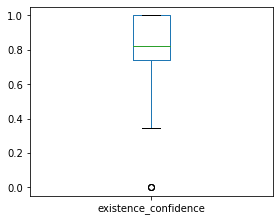

In [ ]:
import matplotlib as mat
%matplotlib inline
tweets_dataset.plot(kind = 'box', subplots = True , layout = (4,4) , sharex = False , figsize = ( 20 , 16 ))
mat.pyplot.show(block=False)

**Find the Number of Retweets**

In [ ]:
# make a new column to highlight retweets
tweets_dataset['is_retweet'] = tweets_dataset['tweets'].apply(lambda x: x[:2]=='RT')
tweets_dataset['is_retweet'].sum()  # number of retweets

101

**Find the Number of Unique retweets**

In [ ]:
 # number of unique retweets
tweets_dataset.loc[tweets_dataset['is_retweet']].tweets.unique().size

86

**Top Most repeated retweets**

In [ ]:
tweets_dataset.groupby(['tweets']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

,tweets,counts
663,Take Action @change: Help Protect Wildlife Hab...,14
237,Fight Climate Change From All Fronts: [link],8
613,SCIENCE: Scientists explore the evolution of c...,6
359,Immigration Reform and Climate Change: A Tale ...,6
116,CLIMATE CHANGE: Forests Not for Absorbing Carb...,6
182,Coalition of the Tired of Waiting: Fighting Cl...,6
130,Carbon offsets: How a Vatican forest failed to...,6
451,No matter if you believe in global warming or ...,5
522,RT @Newsweek: Global Warming Kills Forests In ...,5
701,URUGUAY: Tools Needed for Those Most Vulnerabl...,4


**Count the number of times each tweet appeared**

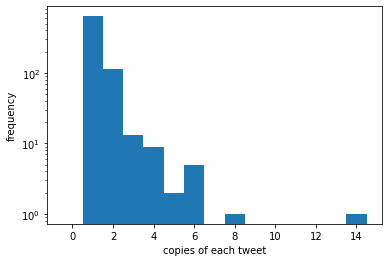

In [ ]:
counts = tweets_dataset.groupby(['tweets']).size().reset_index(name='counts').counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [ ]:
def find_retweeted(tweets):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweets)

def find_mentioned(tweets):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweets)  

def find_hashtags(tweets):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweets)   

In [ ]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
tweets_dataset['retweeted'] = tweets_dataset["tweets"].apply(lambda x : find_retweeted(x))
tweets_dataset['mentioned'] = tweets_dataset["tweets"].apply(lambda x : find_mentioned(x))
tweets_dataset['hashtags'] = tweets_dataset["tweets"].apply(lambda x : find_hashtags(x))

In [ ]:
tweets_dataset.head(10)

,tweets,existence,existence_confidence,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,Yes,1.0000,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,False,[],[],[]
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000,True,"[@sejorg, @JaymiHeimbuch]",[],[]
6,Global warming evidence all around us|A messag...,Yes,1.0000,False,[],[],[]
7,Migratory Birds' New Climate Change Strategy: ...,Yes,1.0000,False,[],[],[]
8,Southern Africa: Competing for Limpopo Water: ...,Yes,1.0000,False,[],[],[]
9,"Global warming to impact wheat, rice productio...",Yes,1.0000,False,[],[],[]


In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_dataset.loc[tweets_dataset.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]

In [ ]:
hashtags_list_df.head(5)

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."


In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags in hashtags_list_df.hashtags for hashtag in hashtags],columns=['hashtag'])

In [ ]:
flattened_hashtags_df.head(5)

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot


**Find the number of unique hash tags**

In [ ]:
flattened_hashtags_df['hashtag'].unique().size

81

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size().reset_index(name='counts').sort_values('counts', ascending=False).reset_index(drop=True)

In [ ]:
popular_hashtags

,hashtag,counts
0,#climate,14
1,#Climate,7
2,#tcot,7
3,#p2,6
4,#green,5
...,...,...
76,#Maine,1
77,#Keston,1
78,#Indigenous,1
79,#IRI,1


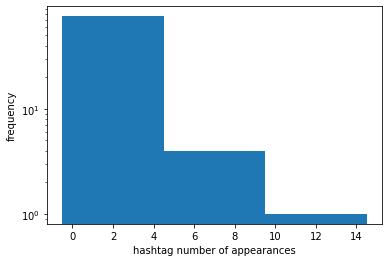

In [ ]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size().reset_index(name='counts').counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [ ]:
# take hashtags which appear at least this amount of times
min_appearance = 3
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtag'])

In [ ]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(lambda hashtag_list: [hashtag for hashtag in hashtag_list if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [ ]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(lambda hashtag_list: int(hashtag in hashtag_list))

In [ ]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

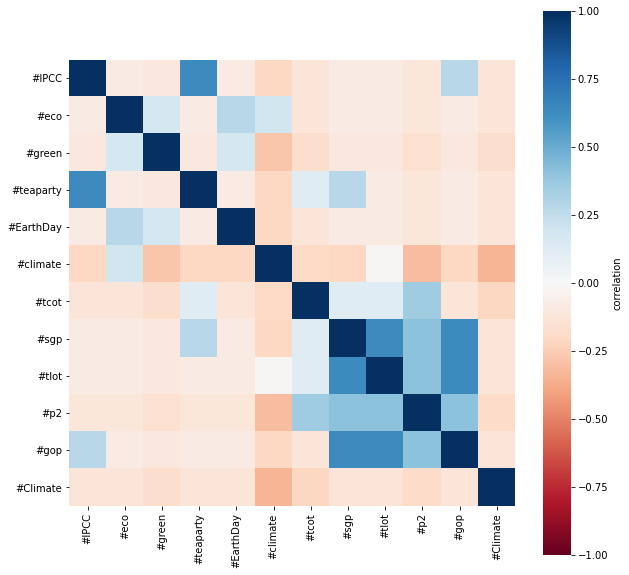

In [ ]:
# calculate the correlation matrix
correlations = hashtag_vector_df.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [ ]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [ ]:
tweets_dataset['clean_tweet'] = tweets_dataset["tweets"].apply(lambda x : clean_tweet(x))

In [ ]:
tweets_dataset.head(5)

,tweets,existence,existence_confidence,is_retweet,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,Yes,1.0000,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,False,[],[],[],uruguay tool need vulner climat chang


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tweets_dataset['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [ ]:
import sys
sys.path.insert(1,'/content/')

#**Implement `LATENT DIRICHLET ALLOCATION` model for tweets**

In [ ]:
import AlgorithmLDA as lda_ul

In [ ]:
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)

In [ ]:
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,chang,65.1,report,55.1,climat,117.9,green,34.1,chang,56.5,could,46.1,climat,356.8,global,65.6,global,344.6,à,121.1
1,climat,62.3,global,40.3,chang,104.1,april,26.1,climat,55.3,energi,38.1,chang,352.9,warm,64.8,warm,330.3,climat,43.1
2,fight,48.1,warm,37.4,bill,67.1,warm,23.9,day,32.1,world,0.1,take,24.2,volcano,35.1,effect,28.9,chang,41.9
3,immigr,40.1,u,34.2,graham,33.1,global,23.9,earth,28.8,us,0.1,us,20.6,scientist,27.1,caus,23.9,trial,15.4
4,legisl,20.1,new,20.1,senat,30.8,help,4.1,allergi,24.6,chang,0.1,new,20.1,help,26.1,say,15.4,clinic,15.4
5,april,4.1,get,13.0,live,18.1,caus,0.2,get,16.2,u,0.1,action,19.2,carbon,14.3,us,12.6,world,3.1
6,u,0.2,effect,2.3,carbon,15.9,u,0.1,clinic,15.8,climat,0.1,say,10.8,action,11.0,world,11.3,take,1.1
7,senat,0.1,allergi,0.1,world,12.8,climat,0.1,trial,15.8,warm,0.1,senat,1.4,take,2.0,allergi,8.6,new,0.1
8,get,0.1,say,0.1,legisl,11.1,fight,0.1,world,4.3,global,0.1,immigr,0.1,caus,1.2,live,7.1,global,0.1
9,bill,0.1,climat,0.1,say,6.1,say,0.1,u,0.1,senat,0.1,caus,0.1,earth,0.4,report,0.1,effect,0.1


# **Implement `Latent Semantic Analysis` model for tweets**

In [ ]:
tf.shape

(999, 36)

In [ ]:
import AlgorithmLSA as lsa

In [ ]:
lsa.LSA_MODEL(tf,vectorizer)

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,climat,0.670762,global,0.679229,à,0.956164,bill,0.822907,report,0.824596,action,0.515462,legisl,0.434135,day,0.495783,climat,0.400045,energi,0.560816,could,0.410640,fight,0.601938,new,0.503380,new,0.520234,effect,0.539145,senat,0.442924,volcano,0.536571,allergi,0.458756,green,0.603083,us,0.533129
1,chang,0.641420,warm,0.652083,clinic,0.171917,graham,0.371754,u,0.239742,help,0.471056,immigr,0.420407,earth,0.424503,scientist,0.222514,fight,0.344248,climat,0.410493,report,0.216629,clinic,0.307107,earth,0.325618,allergi,0.145399,say,0.228231,get,0.327141,green,0.327759,senat,0.375639,u,0.322524
2,global,0.226609,could,0.041383,trial,0.171917,senat,0.232490,allergi,0.219577,take,0.450535,senat,0.240372,clinic,0.325964,say,0.146989,earth,0.193189,allergi,0.277939,legisl,0.156010,trial,0.307107,day,0.269851,chang,0.106571,carbon,0.211186,allergi,0.178086,carbon,0.260390,effect,0.296652,april,0.318530
3,warm,0.207217,effect,0.041324,effect,0.038215,immigr,0.145985,say,0.167174,day,0.199493,action,0.232667,trial,0.325964,us,0.137169,u,0.162099,u,0.271460,help,0.142317,fight,0.306296,green,0.163174,day,0.103138,us,0.210235,scientist,0.104687,april,0.233755,live,0.146729,chang,0.133033
4,à,0.116840,volcano,0.037100,day,0.026323,legisl,0.079802,new,0.116785,earth,0.192610,report,0.232599,energi,0.189619,live,0.127361,could,0.148013,scientist,0.138895,effect,0.138222,energi,0.265818,world,0.147808,u,0.096001,get,0.167354,report,0.104592,u,0.198035,could,0.129279,volcano,0.130382
5,bill,0.086650,à,0.034717,scientist,0.019114,climat,0.050723,caus,0.116065,bill,0.165958,april,0.186696,world,0.107158,energi,0.081046,day,0.136662,trial,0.127839,u,0.126546,green,0.185655,climat,0.130410,earth,0.070928,allergi,0.164591,chang,0.097942,get,0.153209,u,0.090422,day,0.084276
6,graham,0.043162,caus,0.024443,take,0.012246,à,0.042159,bill,0.106117,could,0.162942,climat,0.175925,live,0.096921,action,0.072581,à,0.120692,clinic,0.127839,april,0.120158,senat,0.162235,volcano,0.129832,warm,0.052180,immigr,0.157250,immigr,0.085710,live,0.153166,volcano,0.087247,bill,0.051348


#**LABELLED LDA**

**We need to set labels for each type of data in the tweets**

**For the analysis we are considering we are manually inserting the labels for a sample of 100 tweets**

In [ ]:
labelled_lda = tweets_dataset[["clean_tweet"]].head(100)

In [ ]:
labelled_lda.to_csv("/content/op.csv")

In [ ]:
labelled_lda = pd.read_csv("/content/labelled_lda_tweets.csv")

In [ ]:
import AlgorithmLLDA as llda

In [ ]:
labelled_lda

,clean_tweet,Labels
0,global warm report urg govern act brussel belg...,global warming
1,fight poverti global warm africa,global warming
2,carbon offset vatican forest fail reduc global...,Carbon
3,carbon offset vatican forest fail reduc global...,Carbon
4,uruguay tool need vulner climat chang,climate
...,...,...
95,plant effect way tackl global warm washington ...,global warming
96,climat chang sustain key driver futur econom d...,climate
97,freder hagu #pen climat chang alarm bell whole...,climate
98,us gener say climat chang threaten america sec...,climate


In [ ]:
#create a list of tuples

required_list = list()
for i in labelled_lda.values:
  res = tuple()
  res = res + (i[0],)
  res = res + ([i[1]],)
  required_list.append(res)

In [ ]:
llda_model = llda.LldaModel(labeled_documents=required_list, alpha_vector=0.01)

In [ ]:
arrayof_labels = tweets_dataset[["clean_tweet"]].values[100:500]

In [ ]:
arrayof_labels = [i[0] for i in arrayof_labels]

In [ ]:
len(arrayof_labels)

400

In [ ]:
df = pd.DataFrame()
df["Reviews"]= arrayof_labels
global_warming = list()
common_topic = list()
award = list()
africa = list()
article = list()
india = list()
climate = list()
research = list()
human = list()
carbon = list()
country = list()
california = list()
arizona = list()
mississipi = list()
for i in arrayof_labels:
  topics = llda_model.inference(document=i, iteration=100, times=10)
  for j in topics:
    if(j[0]=="global warming"):
      global_warming.append(j[1])
    elif(j[0]=="common_topic"):
      common_topic.append(j[1])
    elif(j[0]=="award"):
      award.append(j[1])
    elif(j[0]=="africa"):
      africa.append(j[1])
    elif(j[0]=="article"):
      article.append(j[1])
    elif(j[0]=="india"):
      india.append(j[1])
    elif(j[0]=="climate"):
      climate.append(j[1])
    elif(j[0]=="research"):
      research.append(j[1])
    elif(j[0]=="human"):
      human.append(j[1])
    elif(j[0]=="Carbon "):
      carbon.append(j[1])
    elif(j[0]=="country"):
      country.append(j[1])
    elif(j[0]=="california"):
      california.append(j[1])
    elif(j[0]=="arizona "):
      arizona.append(j[1])
    else:
      mississipi.append(j[1])

df["global warming"] = global_warming
df["common_topic"] = common_topic

In [ ]:
df["award"]= award
df["africa"] = africa
df["article"] = article
df["india"] = india
df["climate"] = climate
df["research"] = research
df["human"] = human
df["carbon"] = carbon
df["country"] = country
df["california"] = california
df["arizona"] = arizona
df["mississipi"] = mississipi

In [ ]:
df.head(5)

,Reviews,global warming,common_topic,award,africa,article,india,climate,research,human,carbon,country,california,arizona,mississipi
0,govern report say global warm may caus cancer ...,0.937870,0.030572,0.010848,0.000986,0.010848,0.000986,0.000986,0.000986,0.000986,0.000986,0.000986,0.000986,0.000986,0.000986
1,climat chang increas heat wave flood epa,0.002415,0.268116,0.002415,0.026570,0.026570,0.002415,0.654589,0.002415,0.002415,0.002415,0.002415,0.002415,0.002415,0.002415
2,plant remain effect way tackl global warm,0.017915,0.962541,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629
3,far class gotten heat discuss global climat ch...,0.213355,0.750814,0.001629,0.001629,0.001629,0.017915,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629
4,global warm kill forest colorado,0.003185,0.003185,0.003185,0.003185,0.003185,0.035032,0.003185,0.003185,0.003185,0.926752,0.003185,0.003185,0.003185,0.003185


#**BI TERM TOPIC MODEL ALGORITHM**



In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195418 sha256=5fb0cb0da85e9c40bdac03e2f5baf1aac86a411fdc1cc87d1092072a80651998
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
import AlgorithmBITERM as biterm

In [ ]:
topics= biterm.BITERM_MODEL(tf,vectorizer)

100%|██████████| 100/100 [00:15<00:00,  6.30it/s]
/content/AlgorithmBITERM.py:8: RuntimeWarning: invalid value encountered in true_divide
  topics = btm.fit_transform(biterms, iterations=100)


In [ ]:
topics[0]

array([2.39932210e-01, 1.96595783e-01, 2.08071053e-01, 1.09647136e-06,
       1.93959615e-06, 1.69028232e-02, 1.78074150e-08, 3.09537899e-06,
       1.94498525e-06, 2.74915359e-08, 5.51558343e-03, 1.51342378e-04,
       7.55696870e-05, 2.42146828e-01, 5.14171205e-08, 2.23533234e-08,
       5.42618022e-08, 2.63114345e-08, 9.05934883e-02, 7.04322470e-06])

In [ ]:
texts= tweets_dataset['clean_tweet'].values

In [ ]:
for i in range(len(topics)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))
        

global warm report urg govern act brussel belgium ap world face increas hunger  (topic: 13)
fight poverti global warm africa  (topic: 18)
carbon offset vatican forest fail reduc global warm  (topic: 2)
carbon offset vatican forest fail reduc global warm  (topic: 2)
uruguay tool need vulner climat chang  (topic: 0)
 ocean salti show global warm intensifi water cycl  (topic: 2)
global warm evid around us messag global warm denier doubter look around  (topic: 18)
migratori bird new climat chang strategi stay home  (topic: 0)
southern africa compet limpopo water climat chang bring higher temperatur south  (topic: 0)
global warm impact wheat rice product india ludhiana apr  scarciti water seriou  (topic: 2)
solv global warm thing  (topic: 2)
blog preliminari analysi suggest natur ga could contribut far global warm previous  (topic: 1)
ecoton #climate chang #population perspect  (topic: 0)
climat chang blame coastal whale migrat dwindl à ventura counti  (topic: 0)
spring storm season start l

#**HMM-LDA ALGORITHMS**

In [ ]:
import AlgorithmHMMLDA as HMMLDA

In [ ]:
 nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [ ]:
def get_reuters_token_list_by_sentence(num_doc=100):
    file_list = reuters.fileids()
    corpus = [reuters.sents(file_list[i]) for i in xrange(num_doc)]

    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [ ]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(num_doc=n_docs)

In [ ]:
len(corpus)

881

In [ ]:
n_voca = len(voca)
n_topic = 50
n_class = 20
max_iter = 100
model = HMM_LDA(881, n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [140]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [141]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  trade,because,higher,company,maturing,need,later,by,unchanged,billion
Topic 1 :  institutional,unsold,loss,it,will,noted,for,interim,acquire,cash
Topic 2 :  trade,seen,open,six,world,this,not,received,for,same
Topic 3 :  then,it,potatoes,as,valid,sometimes,lieu,profit,marketing,due
Topic 4 :  saw,it,on,keep,diplomatic,would,hurt,concentrate,pork,account
Topic 5 :  struck,slightly,as,move,former,slide,occur,company,up,productive
Topic 6 :  domestic,bank,unchanged,locally,closed,below,hurting,not,cash,aid
Topic 7 :  trade,for,before,but,paying,were,kilowatt,its,due,half
Topic 8 :  figure,subsidy,their,exchange,most,would,bank,market,century,had
Topic 9 :  reduce,lire,gas,only,be,it,fair,good,not,at
Topic 10 :  tough,they,related,an,non,into,by,future,return,billion
Topic 11 :  trade,as,service,stock,better,shed,money,commercial,loading,billion
Topic 12 :  unit,loss,subject,charge,later,test,spokesman,re,fell,meet
Topic 13 :  trade,bought,quarter,this,for,cumulative,at,proposal

#**Supervised LDA Algorithm**

In [ ]:
!pip install pymc

     |████████████████████████████████| 389kB 5.6MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp36-cp36m-linux_x86_64.whl size=1275926 sha256=d53d0149022e2d8efcf24c28eb9cd4835ebd836f314da39da6b90c68a1f264f8
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [ ]:
training_data = tweets_dataset["clean_tweet"].values

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt


In [ ]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [ ]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus


In [ ]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [ ]:
import AlgorithmsupervisedLDA as slda

In [ ]:
n_doc = len(corpus)
n_voca = voca.size

In [ ]:
n_doc

999

In [ ]:
import random

In [ ]:
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,999)]

In [ ]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -5.108723255685097 
Topic 9 :	 help,new,intern,fight,collagen,news,may,coal,carbon,melt
Eta -2.45359608202027 
Topic 8 :	 action,iceland,say,habitat,world,heart,volcano,us,affect,take
Eta -0.9470921380492804 
Topic 3 :	 one,plant,help,reform,sign,part,money,way,stop,air
Eta 0.6547249601079373 
Topic 2 :	 earth,climate,green,day,could,environment,mention,mani,million,live
Eta 0.8506661660244543 
Topic 6 :	 trial,clinic,fight,get,collagen,scream,news,place,ocean,april
Eta 2.2411970577800715 
Topic 5 :	 put,limbo,like,need,green,nation,unveil,talk,washington,graham
Eta 2.8279544853757312 
Topic 1 :	 carbon,effect,volcano,could,say,glacier,volcan,may,iceland,bird
Eta 3.996729007983287 
Topic 0 :	 new,air,expert,law,california,world,ocean,govern,wait,season
Eta 4.843354666064804 
Topic 7 :	 action,day,take,protect,see,forest,due,graham,come,heat
Eta 7.059220179228235 
Topic 4 :	 april,fight,could,give,blame,new,save,talk,green,us
